# Sample SCRUF output processing
This file contains examples of processing and visualizating the output from a run of SCRUF.

## Imports

In [1]:
import pandas as pd
import numpy as np
import json
import jsonlines
import matplotlib.pyplot as plt
import seaborn as sb

## Reading data frame from post-processing output

In [8]:
output_df = pd.read_csv('/Users/robinburke/Documents/repos/scruf_tors_2023/WorkshopExperiments/data/../data/borda_least_out_s1.csv', header=[0,1], index_col=0)

Note that it produces a DataFrame with a multilevel index for the columns

In [9]:
output_df.head()

Fairness Metric               Compatibility                  Allocation  \
  COUNTRY_low_pfr loan_buck_5 COUNTRY_low_pfr loan_buck_5 COUNTRY_low_pfr   
0             1.0         1.0             NaN         NaN             0.0   
1             0.0         1.0             NaN         NaN             1.0   
2             1.0         0.5             NaN         NaN             0.0   
3             1.0         1.0             NaN         NaN             0.0   
4             1.0         1.0             NaN         NaN             0.0   

                                                              Results  \
  loan_buck_5 none                                                 In   
0         0.0    1  [('178', 1.5698447893057272), ('1790', 1.48884...   
1         0.0    1  [('1447', 2.6705811632797847), ('2335', 2.5344...   
2         1.0    1  [('147', 2.6761511969711065), ('34', 2.6690161...   
3         0.0    1  [('75', 2.406516469659513), ('1447', 2.3046788...   
4         0.0    1  [('402', 2.516268716600265), ('1055', 2.409989...   

                                                          nDCG  \
                                                 Out       All   
0  [('178', 49.0), ('1790', 48.0), ('285', 47.0),...  1.000000   
1  [('1443', 44.0), ('2250', 43.111111111111114),...  0.933930   
2  [('147', 45.94444444444444), ('286', 42.388888...  0.884023   
3  [('75', 49.0), ('1447', 48.0), ('779', 47.0), ...  1.000000   
4  [('402', 49.0), ('1055', 48.0), ('1998', 47.0)...  1.000000   

         Exposure              
  COUNTRY_low_pfr loan_buck_5  
0             0.0         0.1  
1             0.3         0.0  
2             0.0         0.9  
3             0.2         0.0  
4             0.3         0.1

## Time series visualizations

In [4]:
def plot_fairness_time(results_df, include_none=False, image_prefix=None):
    fair_df = results_df['Fairness Metric']
    fig, ax = plt.subplots(figsize=(10, 6))
    sb.set(font_scale=2)
    plt.xlabel("Time")
    plt.ylabel("Fairness")
    sb.lineplot(data=fair_df)
    if image_prefix is not None:
        image_file = image_prefix + '-fairness.png'
        plt.savefig(image_file)

def plot_allocation(results_df, include_none=False, image_prefix=None):
    alloc_df = results_df['Allocation']
    if include_none is False:
        if not alloc_df['none'][1:].any():
            alloc_df.drop('none', axis=1, inplace=True)
    fig, ax = plt.subplots(figsize=(10, 6))
    sb.set(font_scale=2)
    plt.xlabel("Time")
    plt.ylabel("Allocation")
    sb.lineplot(data=alloc_df.cumsum())
    if image_prefix is not None:
        image_file = image_prefix + '-allocation.png'
        plt.savefig(image_file)
        
def plot_compatibility(results_df, include_none=False, image_prefix=None):
    compat_df = results_df['Compatibility']
    fig, ax = plt.subplots(figsize=(10, 6))
    sb.set(font_scale=2)
    plt.xlabel("Time")
    plt.ylabel("Compatibility")
    sb.lineplot(data=compat_df)
    if image_prefix is not None:
        image_file = image_prefix + '-compatibility.png'
        plt.savefig(image_file)

def plot_fairness_regret(results_df, include_none=False, image_prefix=None):
    fair_df = results_df['Fairness Metric']
    regret = 1-fair_df
    fig, ax = plt.subplots(figsize=(10, 6))
    sb.set(font_scale=2)
    plt.xlabel("Time")
    plt.ylabel("Fairness Regret")
    sb.lineplot(data=regret.cumsum())
    if image_prefix is not None:
        image_file = image_prefix + '-regret.png'
        plt.savefig(image_file)

def do_plots(experiment_data, include_none=False, image_prefix=None):
    plot_fairness_time(experiment_data, include_none, image_prefix)
    plot_compatibility(experiment_data, include_none, image_prefix)
    plot_allocation(experiment_data, include_none, image_prefix)
    plot_fairness_regret(experiment_data, include_none, image_prefix)

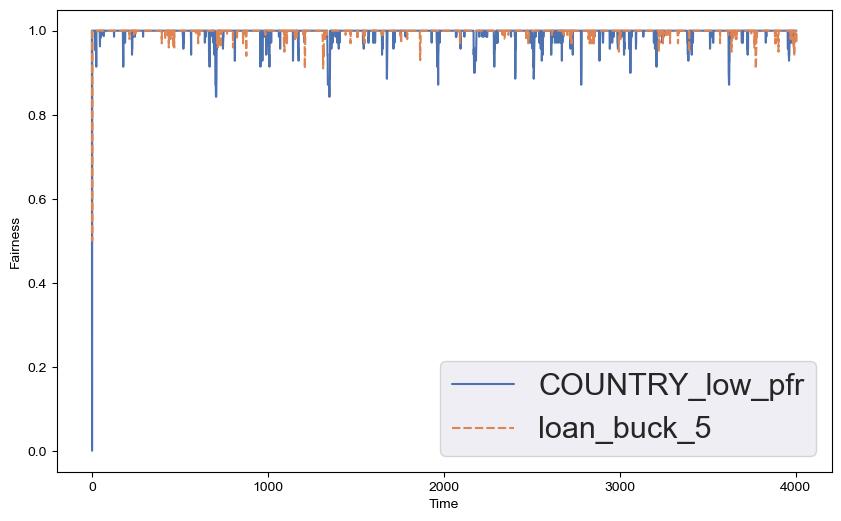

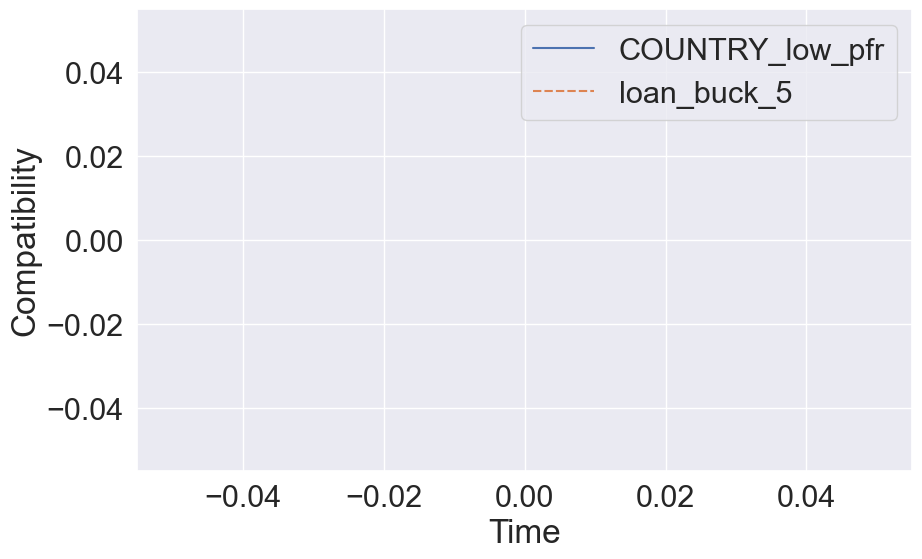

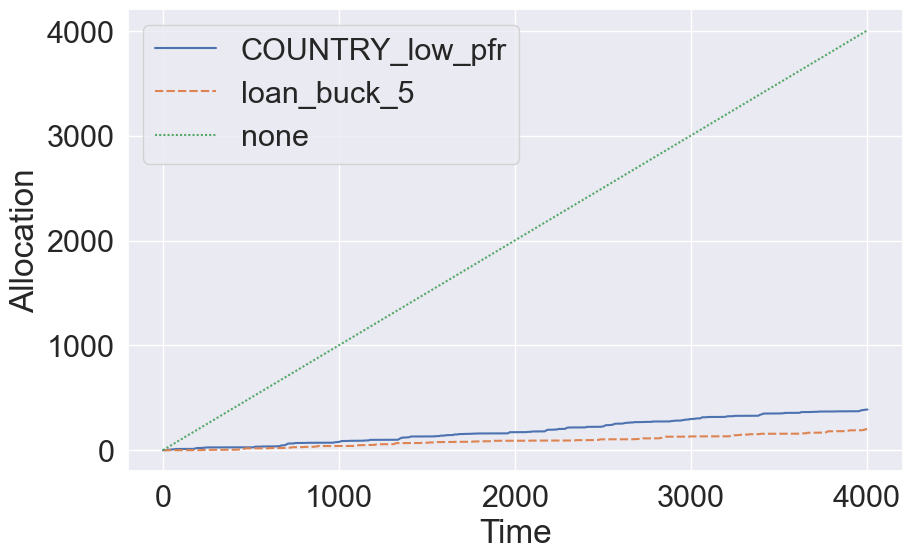

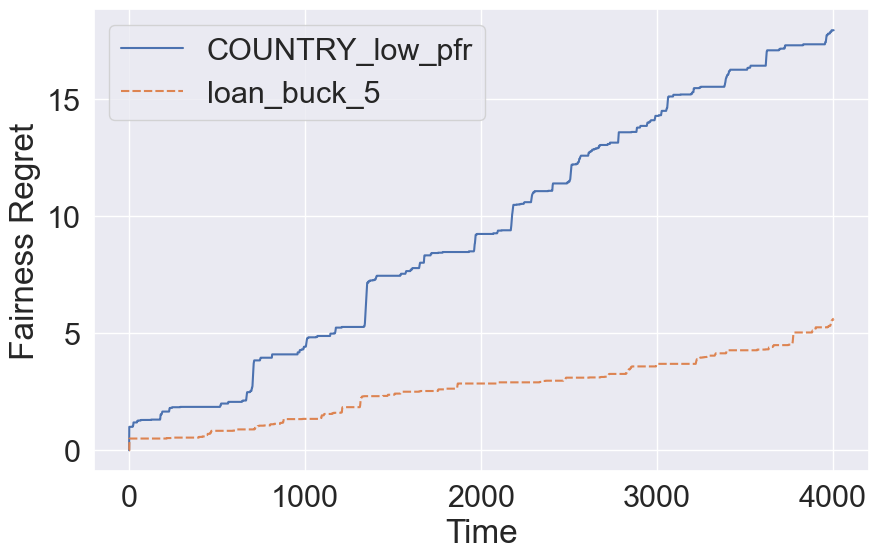

In [5]:
do_plots(output_df, include_none=True)

[Text(0, 0, '')]

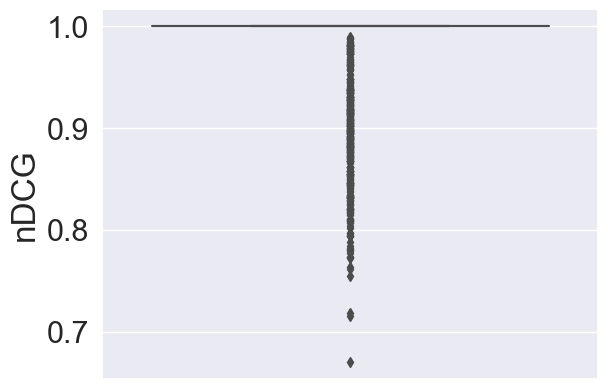

In [6]:
ax = sb.boxplot(output_df.nDCG)
plt.ylabel("nDCG")
ax.set_xticklabels([""])

Text(0, 0.5, 'Exposure')

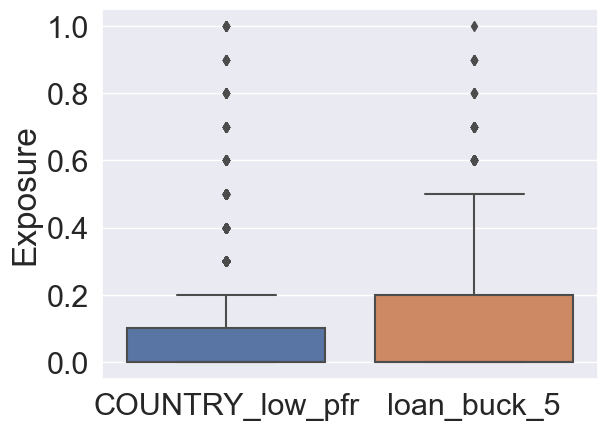

In [10]:
ax = sb.boxplot([output_df[('Exposure', 'COUNTRY_low_pfr')], output_df[('Exposure', 'loan_buck_5')]])
ax.set_xticklabels(['COUNTRY_low_pfr', 'loan_buck_5'])
plt.ylabel('Exposure')

In [231]:
output_df.to_csv('sample_output.csv')